# *Pump-it-up project*

### Can you predict which water pumps are faulty?

## Goal
Using data from Taarifa and the Tanzanian Ministry of Water, predict which pumps are functional, which need some repairs, and which don't work at all based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. 

A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

# III. Model selection and submission
## 1. Data preparation
### 1.1 Libraries and input data

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


pd.set_option('display.max_columns', None)

# machine learning
#Trees    
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

#Ensemble Methods
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # explicitly require this experimental feature
from sklearn.ensemble import HistGradientBoostingClassifier # now you can import normally from ensemble
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

#Gaussian Processes
from sklearn.gaussian_process import GaussianProcessClassifier
    
#GLM
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import Perceptron   
    
#Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
    
#SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC

#Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

 #Navies Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# PCA
from sklearn import decomposition

print("Setup Complete")

Setup Complete


In [75]:
# Specify the path of the CSV file to read
train_df_final = pd.read_csv("train_df_final.csv")
X_test_final = pd.read_csv("X_test_final.csv")

In [76]:
X_test_final.shape

(14850, 80)

In [77]:
train_df_final.shape

(59400, 81)

### 1.2 Train/test splitting

In [78]:
X = train_df_final.drop("label",axis=1)
y = train_df_final["label"]

In [79]:
# Create training and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [80]:
X.isnull().values.any()

False

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

### 1.3 Standard Scaling

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler

In [81]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test_final)

### 1.3 Principle component analysis (PCA)
p.s. It didn't improve the score, so I don't use it in the final model

In [93]:
# Make an instance of the Model
pca = decomposition.PCA(.95)

In [94]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [95]:
pca.n_components_

54

In [96]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_valid_pca = pca.transform(X_valid)

## 2. Model selection
### Test different models with standard parameters on validation set 


**TO DO**: combine all models in a loop

### 2.1 Trees

In [13]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_valid)

acc_decision_tree = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_decision_tree

73.72

In [14]:
# Extra Tree

extra_tree = DecisionTreeClassifier()
extra_tree.fit(X_train, y_train)
y_pred = extra_tree.predict(X_valid)

acc_extra_tree = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_extra_tree

73.65

### 2.2 Ensembles

In [103]:
# Random Forest

rfc = RandomForestClassifier(criterion='entropy', n_estimators = 1000,min_samples_split=8,random_state=42,verbose=5)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_valid)

acc_rfc = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_rfc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
buildi

building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tre

building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tre

building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.2s finished


79.71

In [114]:
# GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.075, 
                                max_depth=13,max_features=0.5,
                                min_samples_leaf=14, verbose=5)

GB.fit(X_train, y_train)     
y_pred = GB.predict(X_valid)

acc_GB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_GB

      Iter       Train Loss   Remaining Time 
         1       39853.3504            2.18m
         2       37696.1498            2.08m
         3       35904.5977            2.02m
         4       34375.7225            1.94m
         5       32951.0138            1.88m
         6       31782.5932            1.83m
         7       30686.7458            1.80m
         8       29733.7355            1.76m
         9       28875.0858            1.74m
        10       28109.5659            1.71m
        11       27341.1749            1.68m
        12       26693.6506            1.67m
        13       26058.6116            1.65m
        14       25482.1132            1.63m
        15       24977.3600            1.65m
        16       24494.1755            1.68m
        17       24064.6758            1.69m
        18       23660.9730            1.71m
        19       23272.2077            1.72m
        20       22906.6124            1.68m
        21       22580.9536            1.65m
        2

79.19

In [17]:
# Histogram-based Gradient Boosting Classification Tree.

#This estimator is much faster than GradientBoostingClassifier for big datasets (n_samples >= 10 000).


HGB = HistGradientBoostingClassifier(learning_rate=0.075, loss='categorical_crossentropy', 
                                               max_depth=8, min_samples_leaf=15)

HGB = HGB.fit(X_train_pca, y_train)

y_pred = HGB.predict(X_valid_pca)

acc_HGB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_HGB

76.41

In [ ]:
# LightGBM 

#is another fast tree based gradient boosting algorithm, which supports GPU, and parallel learning.


LGB = LGBMClassifier(objective='multiclass', learning_rate=0.75, num_iterations=100, 
                     num_leaves=50, random_state=123, max_depth=8)

LGB.fit(X_train, y_train)
y_pred = LGB.predict(X_valid)

acc_LGB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_LGB

In [19]:
# AdaBoost classifier

AB = AdaBoostClassifier(n_estimators=100, learning_rate=0.075)
AB.fit(X_train, y_train)     
y_pred = AB.predict(X_valid)

acc_AB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_AB

66.02

In [53]:
# BaggingClassifier

BC = BaggingClassifier(n_estimators=100)
BC.fit(X_train_pca, y_train)     
y_pred = BC.predict(X_valid_pca)

acc_BC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_BC

75.98

In [99]:
# XGBoost

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=5)
xgb.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

y_pred = xgb.predict(X_valid)
acc_xgb = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_xgb

75.13

In [21]:
# ExtraTreesClassifier

ETC = ExtraTreesClassifier(n_estimators=100)
ETC.fit(X_train, y_train)     
y_pred = ETC.predict(X_valid)

acc_ETC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_ETC

76.56

### 2.3 Generalized Logistic Models

In [22]:
# Logistic Regression for multilabel classification

# https://acadgild.com/blog/logistic-regression-multiclass-classification
# https://medium.com/@jjw92abhi/is-logistic-regression-a-good-multi-class-classifier-ad20fecf1309

LG = LogisticRegression(solver="lbfgs", multi_class="multinomial")
LG.fit(X_train, y_train)     
y_pred = LG.predict(X_valid)

acc_LG = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_LG

68.49

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the odds of the response (and thus increase the probability), and negative coefficients decrease the odds of the response (and thus decrease the probability).

In [23]:
coeff_df = pd.DataFrame(train_df_final.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LG.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,district_code,0.363151
12,public_meeting_code,0.289227
17,construction_year_00s,0.263198
14,funder_other,0.232711
8,region_code,0.125474
20,funder_gov,0.117812
25,construction_year_80s,0.105998
26,construction_year_90s,0.099376
0,LDA_0,0.066505
27,source_machine dbh,0.064803


In [24]:
# PassiveAggressiveClassifier

PAC = PassiveAggressiveClassifier()
PAC.fit(X_train, y_train)
y_pred = PAC.predict(X_valid)

acc_PAC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_PAC

58.33

In [25]:
# RidgeClassifierCV

RC = RidgeClassifierCV()
RC.fit(X_train, y_train)
y_pred = RC.predict(X_valid)

acc_RC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_RC

68.58

In [26]:
# Perceptron

P = Perceptron()
P.fit(X_train, y_train)
y_pred = P.predict(X_valid)

acc_P = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_P

61.18

In [27]:
# Stochastic Gradient Descent
# https://scikit-learn.org/stable/modules/sgd.html

SGD = SGDClassifier(shuffle=True,average=True)
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_valid)

acc_SGD = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_SGD

68.54

### 2.4 KNN

In [28]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)

acc_knn = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_knn

75.14

### 2.5 SVC

In [29]:
# Support Vector Classifier

SVC = SVC(probability=True)
SVC.fit(X_train, y_train)
y_pred = SVC.predict(X_valid)

acc_SVC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_SVC

74.38

In [30]:
# Linear SVC

linear_SVC = LinearSVC()
linear_SVC.fit(X_train,y_train)
linear_SVC.predict(X_valid)

acc_linear_SVC = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_linear_SVC

/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


74.38

### 2.6 Discriminant Analysis

In [36]:
# LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
LDA.predict(X_valid)

acc_LDA = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_LDA

75.45

In [37]:
# QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
QDA.predict(X_valid)

acc_QDA = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_QDA

75.45

### 2.7 Naive Bayes

In [38]:
# BernoulliNB

bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train,y_train)
bernoulliNB.predict(X_valid)

acc_bernoulliNB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_bernoulliNB

75.45

In [39]:
# GaussianNB

gaussianNB = GaussianNB()
gaussianNB.fit(X_train,y_train)
gaussianNB.predict(X_valid)

acc_gaussianNB = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_gaussianNB

75.45

## 3. Compare model results

In [109]:
models = pd.DataFrame({
    'Model': ['LightGBM','Decision Tree',"Extra Tree",'Random Forest','Support Vector', 'KNN', 'Logistic Regression', 
              'Stochastic Gradient Decent', 'Linear SVC',"XGBoost", "Ada Boost Classifier", 
              "Bagging Classifier", "Passive Agressive Cl", "Ridge","Perceptron",
              'Gradient Boosting Classifier','Extra Trees',
              "LinearDA","QuadraticDA","BernoulliNB","GaussianNB"],
    'Score': [acc_LGB,acc_decision_tree,acc_extra_tree,acc_rfc, acc_SVC, acc_knn, acc_LG,
              acc_SGD, acc_linear_SVC, acc_xgb, acc_AB, 
              acc_BC, acc_PAC, acc_RC, acc_P,
              acc_GB, acc_ETC,
             acc_LDA, acc_QDA, acc_bernoulliNB, acc_gaussianNB]})
sorted_by_score = models.sort_values(by='Score', ascending=False)

Text(0, 0.5, 'Model')

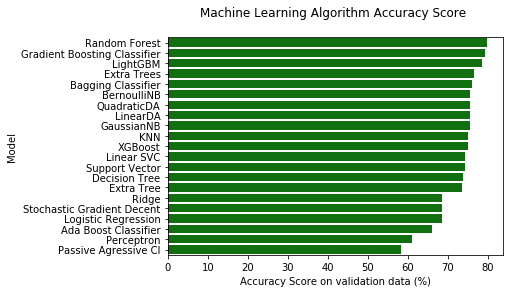

In [110]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='Score', y = 'Model', data = sorted_by_score, color = 'g')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score on validation data (%)')
plt.ylabel('Model')

The top 3 models are: 
- Random Forest
- Gradient Boosting Classifier
- Light GB

Out of them, the Gradient Boosting Classifier is the fastest one but Random Forest gives a little better score so far (79.71 compared to 79.24 of GB).
We are now going to find the best parameters for these 3 models using GridSearch.

## 4. Hyperparameter tuning

We will be using the Grid Search for hyperparameter tuning for 3 best models. 

In [102]:
# Tuning for RF
sc = ss()
X = sc.fit_transform(X)

rfc = RandomForestClassifier(criterion='entropy', n_estimators = 50,random_state=42)

params = {"min_samples_split" : [4, 6, 8],
             "n_estimators" : [500, 700, 1000]}


grid_search = GridSearchCV(estimator=rfc, cv=4, param_grid=params, n_jobs=-1, verbose=5) # n_jobs=-1 = use all the CPU cores

grid_search.fit(X, y.values.ravel())

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 21.8min finished


0.7912626262626262
{'min_samples_split': 8, 'n_estimators': 1000}


In [111]:
# Tuning for LGB
sc = ss()
X = sc.fit_transform(X)

LGB = LGBMClassifier(objective='multiclass', num_threads=2, verbose=2, random_state=123)

params = {'num_iterations ': [100, 150, 200],
          'max_depth': [5, 8, 15],
          'learning_rate': [0.01, 0.75, 0.1, 0.2],
          'num_leaves' : [25, 40, 50]
         }

grid_search = GridSearchCV(estimator=LGB, cv=4, param_grid=params, n_jobs=-1, verbose=5) # n_jobs=-1 = use all the CPU cores

grid_search.fit(X, y.values.ravel())

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 20.7min finished


0.7822558922558923
{'learning_rate': 0.75, 'max_depth': 8, 'num_iterations ': 100, 'num_leaves': 50}


We need to find the following best parameters for our Gradient Boosting model:
- learning rate
- max_depth
- min_samples_leaf
- max_featres
- n_estimators
The full GridSearchCV takes very long (it ran for more than 12h and didn't yet finish, I interrupted manually), so we'll perform a randomized search instead.

Reference: https://zlatankr.github.io/posts/2017/01/23/pump-it-up

In [112]:
# randomized search full
GB = GradientBoostingClassifier(n_estimators=100, 
                                learning_rate=0.075,
                                max_depth=14,
                                max_features=1.0,
                                min_samples_leaf=16)


param_dist = {"n_estimators" : [50,100, 150],
              "learning_rate":[0.05, 0.025, 0.075, 0.01],
             "max_depth" : [12,13,14], 
              "min_samples_leaf":[14,15,16,17],
             "max_features" : [0.5,0.3,0.7,1.0]}

rs = RandomizedSearchCV(estimator=GB,
                  param_distributions=param_dist,
                  scoring='accuracy',
                  cv=10, n_iter=10, n_jobs=-1)

rs.fit(X, y)

print(rs.best_score_)
print(rs.best_params_)

0.7958922558922559
{'n_estimators': 100, 'min_samples_leaf': 14, 'max_features': 0.5, 'max_depth': 13, 'learning_rate': 0.075}


RandomizedSearchCV result:

param_dist 
- "n_estimators" : [50,100, 150],
- "learning_rate":[0.05, 0.025, 0.075, 0.01],
- "max_depth" : [12,13,14], 
- "min_samples_leaf":[14,15,16,17],
- "max_features" : [0.5,0.3,0.7,1.0]

0.7958922558922559
{'n_estimators': 100, 'min_samples_leaf': 14, 'max_features': 0.5, 'max_depth': 13, 'learning_rate': 0.075}

## 5. Retrain the tuned model on the whole train set

For some reason retraining the model on the whole train set (train + validation) gives much worse results on the test set. The reason is not quite clear for me (overfitting?...) and it needs further research. For the time being I will omit this step. Instead I have adjusted above the parameters of the top 3 models based on the tuning.

## 6. Voting classifier

In [115]:
"""
You can combine your best predictors as a VotingClassifier, which can enhance the performance.

"""

estimators = [('RFC', rfc), ('LGB', LGB), ('GB', GB)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 1000
building tree 4 of 1000


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
build

building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tre

building tree 640 of 1000
building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tre

building tree 956 of 1000
building tree 957 of 1000
building tree 958 of 1000
building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


      Iter       Train Loss   Remaining Time 
         1       49679.7470            2.27m
         2       47067.2601            2.22m
         3       44894.8309            2.19m
         4       42942.2528            2.15m
         5       41277.4405            2.13m
         6       39647.0553            2.11m
         7       38324.9767            2.08m
         8       37172.3188            2.06m
         9       36110.6005            2.03m
        10       35137.9947            2.01m
        11       34206.0436            2.00m
        12       33336.7200            1.98m
        13       32556.8920            1.96m
        14       31867.9851            1.93m
        15       31231.6218            1.93m
        16       30676.5961            1.95m
        17       30123.2795            1.97m
        18       29603.8700            1.98m
        19       29137.5985            1.98m
        20       28650.9035            1.97m
        21       28207.1309            1.93m
        2

VotingClassifier(estimators=[('RFC',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=8,
                                                     min_weight_fraction_leaf=0.0,
    

## 7. Submission

In [116]:
submission_df = pd.read_csv("SubmissionFormat.csv")

In [123]:
X_test = sc.transform(X_test_final)
submission_df['status_group']=rfc.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.3s finished


In [124]:
vals_to_replace = {2:'functional', 1:'functional needs repair', 0:'non functional'}

submission_df.status_group = submission_df.status_group.replace(vals_to_replace)

In [125]:
submission_df.to_csv("submission_TatianaSwrt_rfc_noretrain_80.csv",sep=',', index=False)

## 8. Conclusion and possible future improvements

The goal of this project was to predict if a pump is functional, non-functional or needs repair based on some data describing the pump and its surroundings.

In my research I've first performed an exploratory data analysis. In the beginning I calculated a preliminary/baseline accuracy score which means that a model predicting with the accuracy less than 54.31% is not adding any value, so it would not be better than an uneducated guess. I then splited the data into numerical and categorical columns, identified missing values to deal with in the preprocessing phase, searched for outliers in the data and 
assessed correlations among attributes.

In the next step I've performed data cleaning and preprocessing. First of all I dropped features containing similar information to avoid multicollinearity. Then I filled missing values, reduced cardinality of several categorical features that had many types of values to be able to encode them. I performed ordinal encoding for those variables where it made sense and one-hot encoding for the rest of variables. Finally, I used feature engineering to create new predictors (including LDA, binning, binary variables, turning a date-time variable into a continious numerical variable).

After all the preprocessing I performed feature selection based on L1 regularization with logistic regression that yielded 80 most important variables out of 90 total columns.

In the final step I tested multiple models with standard parameters and plotted the results on a graph.

The top 3 models for this project are: 
- Random Forest
- Gradient Boosting Classifier
- Light Gradient Boosting Classifier

Hyperparameter tuning has only slightly improved the scores.
Surprisingly retraining didn't improve the scores, this needs to be further investigated.
Principle Component Analysis didn't improve the scores either as well as  a Voting classifier I created using all 3 top models listed above.

**I achieved the maximum of 79.71% accuracy on the validation data and 79.6% accuracy on the test data submitted to the competition on DrivenData with the Random Forest model.**

Ideas for future improvements:

- Create a 'for' loop to automate the process of model selection
- More feature ingeneering
- Try to remove amount_tsh
- 2 binary variables -> replace unknown with false
- Log transform to reduce skew: population, amount_tsh
- Don't do ordinal but other type of encoding
- Deal with imbalanced classes (keras to balance classes?)
- Xgboost -> feature importance (not Random Forest)
- Try a different scaler
- Remove outliers in the population variable
- Fill missing values with median/mean